In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [28]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:>

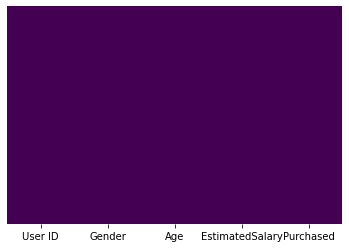

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Hurray! no null values

### Converting Categorical Features

In [31]:
gender =  pd.get_dummies(df['Gender'],drop_first=True)

In [32]:
df.drop(['Gender'],axis=1,inplace=True)

In [33]:
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [34]:
df=pd.concat([df,gender],axis=1)

In [35]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


## Building a Logistic Regression model

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
x_train,x_test,y_train,y_test =train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=101)

### Training and Predicting

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [40]:
predictions = logmodel.predict(x_test)

In [41]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [44]:
y_test

38     0
387    0
270    0
181    0
195    0
      ..
228    0
178    0
267    0
147    0
230    1
Name: Purchased, Length: 120, dtype: int64

### Evaluation

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        80
           1       0.84      0.53      0.65        40

    accuracy                           0.81       120
   macro avg       0.82      0.74      0.76       120
weighted avg       0.81      0.81      0.79       120

